In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import glob
import os

In [2]:
# Read in USGS Streamflow data from Rock Creek (06632400)
usgs = pd.read_csv('USGS-06632400.txt',comment='#', usecols=range(2,4), delim_whitespace=True) # read in USGS data
usgs = usgs.drop(usgs.index[0])                                    # drop format line
usgs.columns = ['datetime','obs_streamflow']                           # rename columns
usgs = usgs[usgs.obs_streamflow!='Ice']                                # delete any rows with 'Ice'
usgs[['obs_streamflow']] = usgs[['obs_streamflow']].apply(pd.to_numeric)   # convert to float
usgs.loc[:,'obs_streamflow'] /= 35.3147                                # convert from ft3/s to m3/s
usgs['datetime'] = pd.to_datetime(usgs['datetime'], format='%Y/%m/%d')  # convert to datetime format
usgs['Month'] = usgs['datetime'].dt.month      # create Month column from datetime
usgs['Year'] = usgs['datetime'].dt.year    # create Month column from datetime
usgs_mon = usgs.groupby(['Year','Month']).mean()  # groupby Year and Month and take average of groups --> monthly averages
usgs_mon = usgs_mon.reset_index()
usgs_mon.head(n=5)            # print usgs data table

,Year,Month,obs_streamflow
0,1954,10,0.300432
1,1954,11,0.159896
2,1954,12,0.187987
3,1955,1,0.170175
4,1955,2,0.157563


In [3]:
# Read in streamflow output from 30 VIC simulations with parameters selected via latin hypercube
# values obtained by weighting by area the 10 grid cells overlapping the Rock Creek drainage and averaged by month
path = r'C:\Users\carrie.morrill\Jupyter\ROCK-monthly-outputs'                     
all_files = glob.glob(os.path.join(path, "monthly*.txt"))    
df_from_each_file = (pd.read_csv(f, header=None) for f in all_files)
vic   = pd.concat(df_from_each_file, axis=1, ignore_index=True)
#vic.columns = [str(x) for x in (list(range(1,31)))]  
vic['datetime'] = pd.date_range(start='1/1/1950',end='12/31/2015',freq='MS')
vic['Month'] = vic['datetime'].dt.month      # create Month column from datetime
vic['Year'] = vic['datetime'].dt.year    # create Month column from datetime
vic.head(n=5)                                                                   # print vic data table

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,datetime,Month,Year
0,2.554084,7.019161,2.876159,7.684726,7.852560,8.005616,1.890199,4.849235,6.089782,0.143655,...,2.633538,2.311464,4.716677,2.447794,1.162553,8.362153,5.742208,1950-01-01,1,1950
1,1.896406,0.494598,2.131945,2.270547,0.792896,0.640264,1.368138,1.104164,0.024777,0.161490,...,1.560851,2.019026,2.859626,0.809550,1.145895,2.402140,2.628831,1950-02-01,2,1950
2,1.424654,0.401000,1.584350,0.810107,0.486442,0.102276,0.999468,0.281830,0.030692,0.169961,...,0.938534,1.697445,1.667712,0.679576,1.076217,0.842552,1.272834,1950-03-01,3,1950
3,2.066426,1.569068,1.676699,1.346084,1.760038,1.774893,1.392514,0.433714,0.563445,0.837674,...,0.728566,2.052281,1.811122,1.238984,1.429021,1.379396,1.905336,1950-04-01,4,1950
4,4.586203,6.309430,3.268674,4.713016,6.161866,6.599919,3.010061,2.238271,3.526813,2.262316,...,1.546388,3.653921,4.092762,4.928010,2.448917,4.826884,5.135488,1950-05-01,5,1950


In [4]:
# Merge the observation table with the simulation table
merged = pd.merge(usgs_mon,vic,how='inner',left_on=['Year','Month'], right_on=['Year','Month']) 
merged = merged.set_index("Year")
merged.head(n=5)                                                                           

,Month,obs_streamflow,0,1,2,3,4,5,6,7,...,21,22,23,24,25,26,27,28,29,datetime
Year,,,,,,,,,,,,,,,,,,,,,
1954,10,0.300432,0.815043,0.014345,0.701990,0.260819,0.252983,1.315691,0.693564,0.120805,...,0.026664,1.299341,0.458709,1.006037,0.428323,0.289760,0.852764,0.197836,0.568275,1954-10-01
1954,11,0.159896,0.671440,0.016074,0.675765,0.484793,0.117164,0.944993,0.422426,0.049512,...,0.018014,0.792113,0.261077,0.767841,0.206926,0.165198,0.719233,0.317969,0.515818,1954-11-01
1954,12,0.187987,0.505664,0.015502,0.576726,0.391969,0.025758,0.340206,0.243034,0.010186,...,0.012353,0.255370,0.146593,0.592406,0.084260,0.082636,0.616432,0.292332,0.363053,1954-12-01
1955,1,0.170175,0.407986,0.015612,0.460468,0.236237,0.020018,0.146280,0.168655,0.008363,...,0.012508,0.139888,0.087903,0.495731,0.056011,0.063183,0.563741,0.196552,0.248642,1955-01-01
1955,2,0.157563,0.326950,0.015326,0.364062,0.156681,0.017637,0.087519,0.120586,0.007861,...,0.012358,0.090696,0.055503,0.417107,0.042255,0.050454,0.517408,0.137446,0.173260,1955-02-01


In [5]:
# Create a new table with just even years (calibration period)
odds = list(range(1955,2016,2))
merged_evens = merged.drop(odds)
merged_evens.head(n=5)

,Month,obs_streamflow,0,1,2,3,4,5,6,7,...,21,22,23,24,25,26,27,28,29,datetime
Year,,,,,,,,,,,,,,,,,,,,,
1954,10,0.300432,0.815043,0.014345,0.701990,0.260819,0.252983,1.315691,0.693564,0.120805,...,0.026664,1.299341,0.458709,1.006037,0.428323,0.289760,0.852764,0.197836,0.568275,1954-10-01
1954,11,0.159896,0.671440,0.016074,0.675765,0.484793,0.117164,0.944993,0.422426,0.049512,...,0.018014,0.792113,0.261077,0.767841,0.206926,0.165198,0.719233,0.317969,0.515818,1954-11-01
1954,12,0.187987,0.505664,0.015502,0.576726,0.391969,0.025758,0.340206,0.243034,0.010186,...,0.012353,0.255370,0.146593,0.592406,0.084260,0.082636,0.616432,0.292332,0.363053,1954-12-01
1956,1,0.236126,0.311557,0.004027,0.315960,0.211949,0.024441,0.627784,0.118128,0.009405,...,0.004086,0.504246,0.058113,0.405492,0.041485,0.069661,0.457837,0.113840,0.187407,1956-01-01
1956,2,0.197730,0.261097,0.003875,0.278951,0.176257,0.004541,0.180976,0.071587,0.001426,...,0.002852,0.136256,0.032763,0.326186,0.016823,0.043988,0.407813,0.119608,0.159188,1956-02-01


In [6]:
# Create a new table with just odd years (validation period)
# Verified that streamflow distribution for odd years is statistically indistinguishable (K-S test) from even years
evens = list(range(1954,2015,2))
merged_odds = merged.drop(evens)
merged_odds.head(n=5)

,Month,obs_streamflow,0,1,2,3,4,5,6,7,...,21,22,23,24,25,26,27,28,29,datetime
Year,,,,,,,,,,,,,,,,,,,,,
1955,1,0.170175,0.407986,0.015612,0.460468,0.236237,0.020018,0.146280,0.168655,0.008363,...,0.012508,0.139888,0.087903,0.495731,0.056011,0.063183,0.563741,0.196552,0.248642,1955-01-01
1955,2,0.157563,0.326950,0.015326,0.364062,0.156681,0.017637,0.087519,0.120586,0.007861,...,0.012358,0.090696,0.055503,0.417107,0.042255,0.050454,0.517408,0.137446,0.173260,1955-02-01
1955,3,0.188170,0.261606,0.014998,0.286031,0.113530,0.017866,0.060284,0.088525,0.008272,...,0.012273,0.065953,0.036786,0.351784,0.035771,0.042043,0.475160,0.103894,0.126765,1955-03-01
1955,4,0.442120,0.751707,0.033313,0.399300,0.248634,0.412842,0.672671,0.385613,0.162413,...,0.051841,0.657475,0.088206,0.615884,0.346970,0.282887,0.654307,0.288301,0.655597,1955-04-01
1955,5,4.089497,3.316137,3.989700,2.349915,4.857508,4.156816,7.176892,1.727904,1.216081,...,2.462448,8.463327,0.626694,2.353333,2.652369,1.480349,1.723847,4.756665,4.671384,1955-05-01


In [7]:
# Calculate long-term monthly means for hydrograph plot
monthly = merged.groupby('Month').mean()
monthly = monthly.reset_index()
monthly

,Month,obs_streamflow,0,1,2,3,4,5,6,7,...,20,21,22,23,24,25,26,27,28,29
0,1,0.286954,0.503919,0.066816,0.603854,0.274971,0.077999,0.167576,0.393409,0.046440,...,0.292824,0.062393,0.144290,0.251090,0.770507,0.183518,0.118178,0.863128,0.250491,0.312022
1,2,0.278035,0.401505,0.055979,0.465211,0.170261,0.067534,0.104712,0.292074,0.043813,...,0.204883,0.052721,0.106281,0.168491,0.645112,0.136972,0.104486,0.793415,0.162948,0.206276
2,3,0.292313,0.494136,0.116046,0.437948,0.252972,0.210075,0.403969,0.319957,0.092730,...,0.184897,0.083525,0.492871,0.140290,0.640629,0.216005,0.171482,0.795640,0.249375,0.349964
3,4,0.674943,1.398817,0.870769,0.935752,1.331224,1.198181,2.307969,0.778771,0.430851,...,0.396194,0.552498,2.770749,0.274969,1.145413,0.879556,0.614680,1.116555,1.303348,1.576211
4,5,6.619942,5.728747,7.978813,3.972665,6.356262,7.750976,9.507986,3.493345,3.430219,...,2.282466,5.518748,11.220162,1.839173,3.863099,4.747914,5.135225,2.771013,6.625871,6.830986
5,6,13.510274,11.167114,12.899704,10.656684,10.549196,12.974269,13.388218,6.284903,10.141367,...,6.369533,12.834736,13.096274,6.032836,7.205758,9.168980,11.620920,4.739845,11.951587,10.703987
6,7,3.330406,3.399365,2.289845,4.369834,6.060783,3.157463,4.163352,3.908570,5.393962,...,5.590587,4.388610,2.466455,5.654066,4.670349,5.649050,2.764260,3.463276,5.659881,5.343358
7,8,0.786115,1.057834,0.048176,1.577084,2.193639,0.193014,0.587132,2.339848,1.248893,...,2.782513,0.288647,0.210788,3.215978,2.206027,2.596877,0.430385,1.647452,1.280888,2.176714
8,9,0.553374,0.944832,0.014949,1.141226,0.730966,0.202686,0.574102,1.707129,0.362583,...,1.709113,0.032869,0.542612,1.858748,1.652116,1.368201,0.374742,1.346735,0.427255,1.150628
9,10,0.453411,1.009845,0.054498,1.040293,0.688397,0.300697,1.284340,1.283019,0.185564,...,1.098092,0.053875,1.276158,1.101731,1.427678,0.815671,0.357002,1.214919,0.517979,0.978466


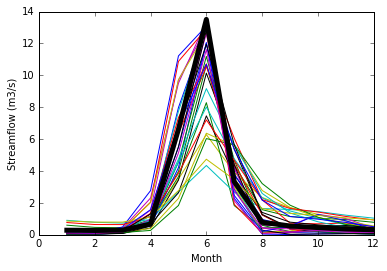

In [8]:
# hydrograph plot with all 30 simulations, thick black line is observations
plt.plot(monthly.iloc[:,0],monthly.iloc[:,3:32])
plt.plot(monthly.Month,monthly.obs_streamflow, linewidth=5.0, color='black')
plt.xlabel("Month")
plt.ylabel("Streamflow (m3/s)")
plt.show()

In [9]:
# Read in parameter values that were used in each of the 30 simulations
path = r'C:\Users\carrie.morrill\Jupyter\ROCK-parameter'                     
all_files = glob.glob(os.path.join(path, "parameter*.txt"))    
df_from_each_file = (pd.read_csv(f, header=None, delim_whitespace=True, usecols=(4,5,6,7,23,24),nrows=1) for f in all_files)
params = pd.concat(df_from_each_file, axis=0, ignore_index=True)
params.columns = ('binf','Ds','Dsmax','Ws',"Soil2",'Soil3')
params

,binf,Ds,Dsmax,Ws,Soil2,Soil3
0,0.323433,0.174862,10.734611,0.753225,0.199665,0.561051
1,0.011821,0.459101,20.174025,0.064281,1.008431,0.601568
2,0.075837,0.119911,22.364008,0.683214,0.267577,0.807190
3,0.064702,0.759561,6.009952,0.228746,0.338146,1.036636
4,0.393496,0.837997,19.101133,0.617834,0.896638,0.393647
5,0.277454,0.655984,28.897255,0.571779,0.109154,0.956659
6,0.353001,0.285279,8.391461,0.386464,1.289568,1.285900
7,0.138758,0.621359,14.596181,0.951857,1.424413,0.462868
8,0.248552,0.560897,13.465821,0.196773,1.487636,0.259439
9,0.310043,0.508943,0.301587,0.889616,1.075713,0.617439


In [11]:
# calculate evaluation statistics for each of the 30 simulations as in Moriasi
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
def bias(predictions, targets):
    return (predictions - targets).mean()
def NashSut(predictions, targets):
    return (1. - ((predictions - targets) ** 2).sum()/((targets - targets.mean()) ** 2).sum())
def pbias(predictions, targets):
    return ((targets - predictions).sum()*100)/(targets.sum())
def rsr(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).sum())/np.sqrt(((targets - targets.mean()) ** 2).sum())

columns = ['rsr-C','pbias-C','NSE-C','rsr-V','pbias-V','NSE-V']
index = range(0,30)  
cstats = pd.DataFrame(index=index, columns=columns)
for i in range(2,32):
    cstats.iloc[i-2,0]=rsr(merged_evens.iloc[:,i],merged_evens.iloc[:,1])  # want <=0.5
    cstats.iloc[i-2,1]=pbias(merged_evens.iloc[:,i],merged_evens.iloc[:,1])  # <= + 10%, >= - 10%
    cstats.iloc[i-2,2]=NashSut(merged_evens.iloc[:,i],merged_evens.iloc[:,1])  # want >0.75
    cstats.iloc[i-2,3]=rsr(merged_odds.iloc[:,i],merged_odds.iloc[:,1])  # want <=0.5
    cstats.iloc[i-2,4]=pbias(merged_odds.iloc[:,i],merged_odds.iloc[:,1])  # <= + 10%, >= - 10%
    cstats.iloc[i-2,5]=NashSut(merged_odds.iloc[:,i],merged_odds.iloc[:,1])  # want >0.75
cstats = pd.merge(cstats, params, left_index=True, right_index=True)
cstats['Soil2+3']=cstats['Soil2']+cstats['Soil3']
cstats

,rsr-C,pbias-C,NSE-C,rsr-V,pbias-V,NSE-V,binf,Ds,Dsmax,Ws,Soil2,Soil3,Soil2+3
0,0.477531,-1.17049,0.771964,0.421313,0.00675226,0.822496,0.323433,0.174862,10.734611,0.753225,0.199665,0.561051,0.760717
1,0.532601,10.2406,0.716336,0.413616,10.9881,0.828921,0.011821,0.459101,20.174025,0.064281,1.008431,0.601568,1.609999
2,0.519618,1.02919,0.729997,0.48712,2.55236,0.762714,0.075837,0.119911,22.364008,0.683214,0.267577,0.807190,1.074767
3,0.538625,-8.50843,0.709884,0.507113,-8.92455,0.742837,0.064702,0.759561,6.009952,0.228746,0.338146,1.036636,1.374782
4,0.498661,3.45671,0.751338,0.395099,4.06251,0.843897,0.393496,0.837997,19.101133,0.617834,0.896638,0.393647,1.290285
5,0.555475,-23.5437,0.691447,0.472618,-23.7076,0.776633,0.277454,0.655984,28.897255,0.571779,0.109154,0.956659,1.065813
6,0.67219,18.3862,0.548161,0.661892,19.6781,0.561898,0.353001,0.285279,8.391461,0.386464,1.289568,1.285900,2.575468
7,0.561912,21.1144,0.684255,0.52841,22.2017,0.720783,0.138758,0.621359,14.596181,0.951857,1.424413,0.462868,1.887280
8,0.482633,19.8643,0.767066,0.399867,21.1145,0.840106,0.248552,0.560897,13.465821,0.196773,1.487636,0.259439,1.747075
9,0.577556,34.3043,0.666429,0.566362,38.7632,0.679235,0.310043,0.508943,0.301587,0.889616,1.075713,0.617439,1.693152


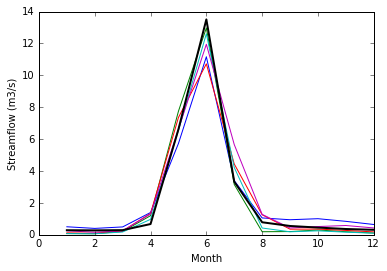

In [12]:
# plot hydrographs of just the simulations that met the evaluation criteria specified by Moriasi, black line=observations
plt.plot(monthly.iloc[:,0],monthly.iloc[:,2])
plt.plot(monthly.iloc[:,0],monthly.iloc[:,6])
plt.plot(monthly.iloc[:,0],monthly.iloc[:,19])
plt.plot(monthly.iloc[:,0],monthly.iloc[:,21])
plt.plot(monthly.iloc[:,0],monthly.iloc[:,30])
plt.plot(monthly.Month,monthly.obs_streamflow, linewidth=2.0, color='black')
plt.xlabel("Month")
plt.ylabel("Streamflow (m3/s)")
plt.show()

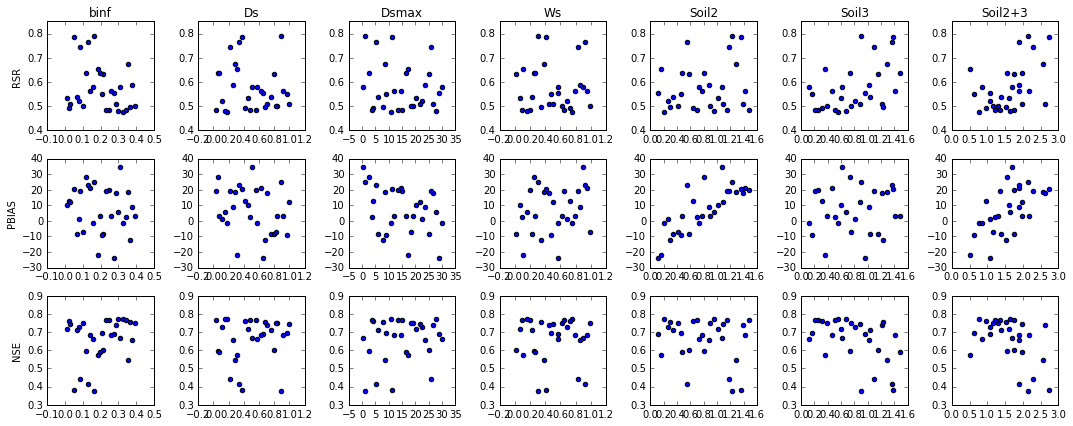

In [13]:
# make scatter plots of parameter values by Moriasi statistics
fig, axes = plt.subplots(nrows=3, ncols=7, figsize=(15, 6))

axes[0,0].scatter(cstats['binf'], cstats['rsr-C'])
axes[0,1].scatter(cstats['Ds'], cstats['rsr-C'])
axes[0,2].scatter(cstats['Dsmax'], cstats['rsr-C'])
axes[0,3].scatter(cstats['Ws'], cstats['rsr-C'])
axes[0,4].scatter(cstats['Soil2'], cstats['rsr-C'])
axes[0,5].scatter(cstats['Soil3'], cstats['rsr-C'])
axes[0,6].scatter(cstats['Soil2+3'], cstats['rsr-C'])
axes[1,0].scatter(cstats['binf'], cstats['pbias-C'])
axes[1,1].scatter(cstats['Ds'], cstats['pbias-C'])
axes[1,2].scatter(cstats['Dsmax'], cstats['pbias-C'])
axes[1,3].scatter(cstats['Ws'], cstats['pbias-C'])
axes[1,4].scatter(cstats['Soil2'], cstats['pbias-C'])
axes[1,5].scatter(cstats['Soil3'], cstats['pbias-C'])
axes[1,6].scatter(cstats['Soil2+3'], cstats['pbias-C'])
axes[2,0].scatter(cstats['binf'], cstats['NSE-C'])
axes[2,1].scatter(cstats['Ds'], cstats['NSE-C'])
axes[2,2].scatter(cstats['Dsmax'], cstats['NSE-C'])
axes[2,3].scatter(cstats['Ws'], cstats['NSE-C'])
axes[2,4].scatter(cstats['Soil2'], cstats['NSE-C'])
axes[2,5].scatter(cstats['Soil3'], cstats['NSE-C'])
axes[2,6].scatter(cstats['Soil2+3'], cstats['NSE-C'])
axes[0,0].set_title('binf')
axes[0,1].set_title('Ds')
axes[0,2].set_title('Dsmax')
axes[0,3].set_title('Ws')
axes[0,4].set_title('Soil2')
axes[0,5].set_title('Soil3')
axes[0,0].set_ylabel('RSR')
axes[1,0].set_ylabel('PBIAS')
axes[2,0].set_ylabel('NSE')
axes[0,6].set_title('Soil2+3')
plt.tight_layout()
plt.show()